<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Lab_Exam_ML_AI_16_05_2025PascalMusabyimana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

# PART 1


This credit_score.csv dataset contains financial and personal information for 32581 individuals and is designed for a machine learning classification task focused on loan default prediction.

**General Overview:**
- The dataset captures various aspects of borrowers' profiles including demographic information, financial status, loan details, and credit history.
- The target variable is **loan_status** (binary integer), which indicates whether a loan defaulted (1) or was paid as agreed (0).
- You are asked to build, train, test and optimize machine learning models to predict the likelihood of loan default based on the provided features.

**feature overview**

1. **person_age**: Age of the individual (integer)
2. **person_income**: Annual income of the individual (integer)
3. **person_home_ownership**: Housing status (string - likely categories like "Own", "Rent", etc.)
4. **person_emp_length**: Employment length in years (float)
5. **loan_intent**: Purpose of the loan (string)
6. **loan_grade**: Credit grade assigned to the loan (string)
7. **loan_amnt**: Amount of loan requested (integer)
8. **loan_int_rate**: Interest rate of the loan (float)
9. **loan_status**: Loan status indicator (integer - likely binary where 1 might indicate default)
10. **loan_percent_income**: Loan amount as a percentage of income (float)
11. **cb_person_default_on_file**: Whether the person has defaulted before (string "Y"/"N")
12. **cb_person_cred_hist_length**: Length of credit history in years (integer)



In [2]:
df = pd.read_csv('credit_score.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
print(df['loan_status'].value_counts(normalize=True))

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64


In [4]:
missing_values = df.isnull().sum()
print(missing_values)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [5]:
df = df.dropna()

## Data expoloration and visualization

Create boxplots for each numerical feature grouped by loan_status (e.g., person_age, person_income, person_emp_length, etc.). In other words: for each boxplot, put loan_status (0 or 1) on the x-axis and the numerical feature on the y-axis.


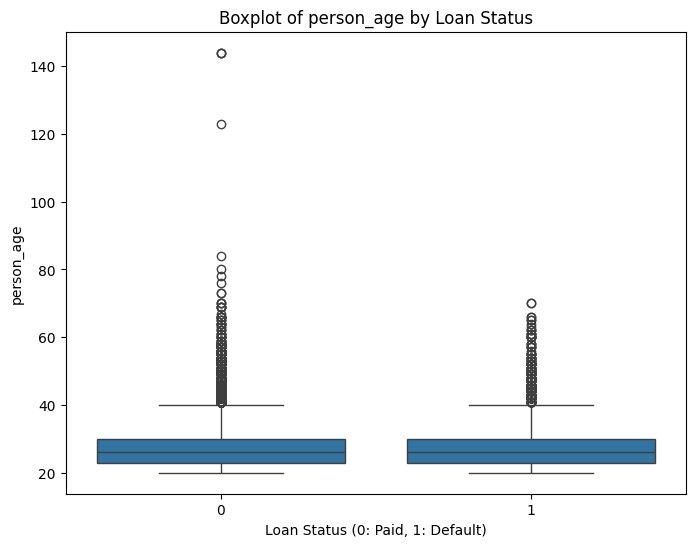

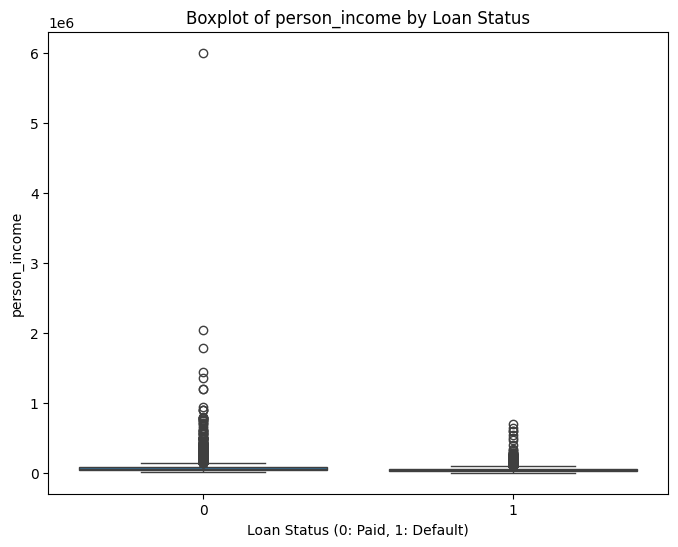

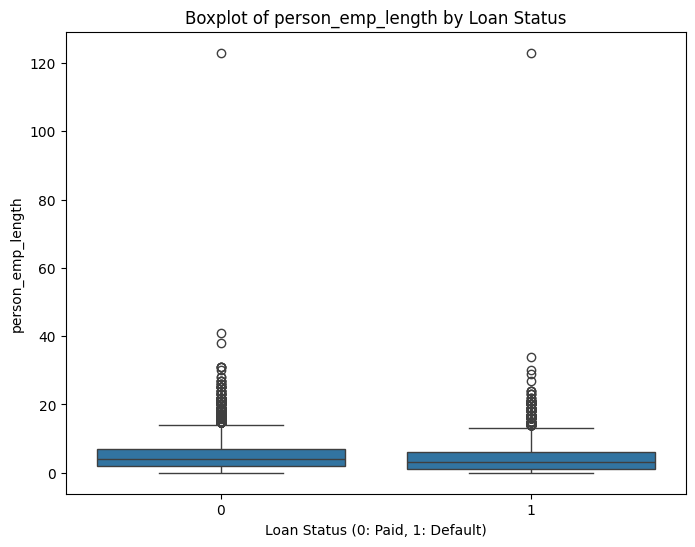

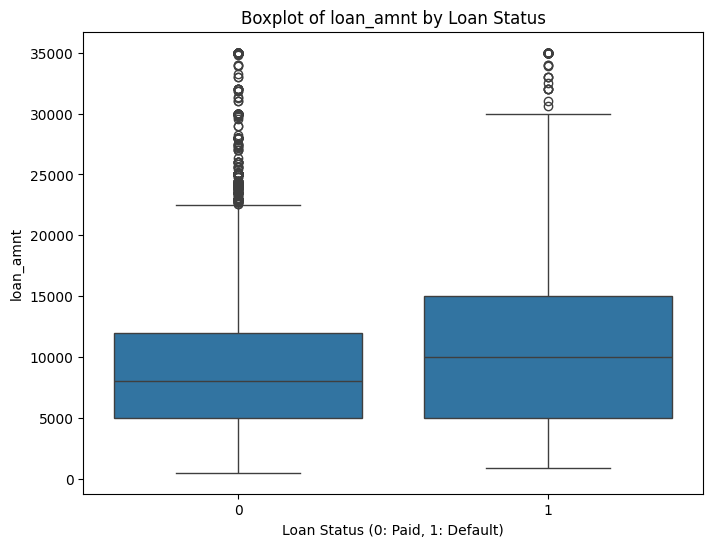

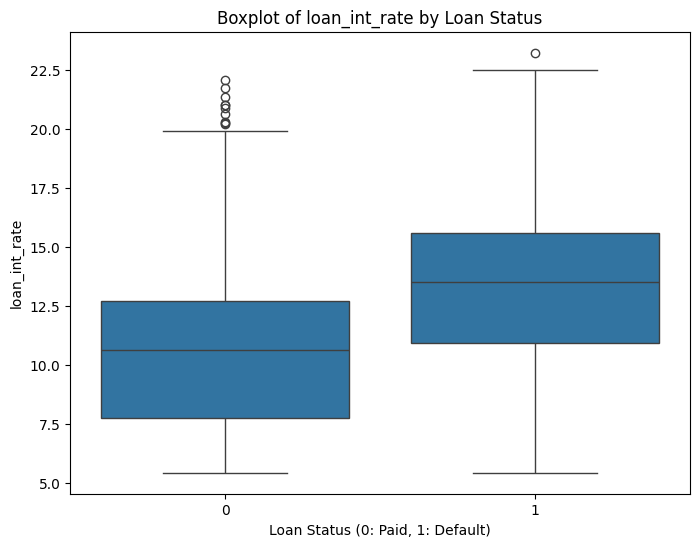

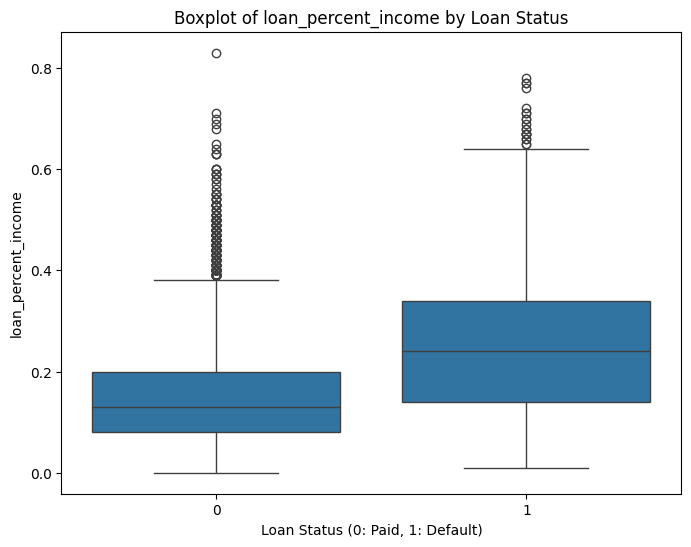

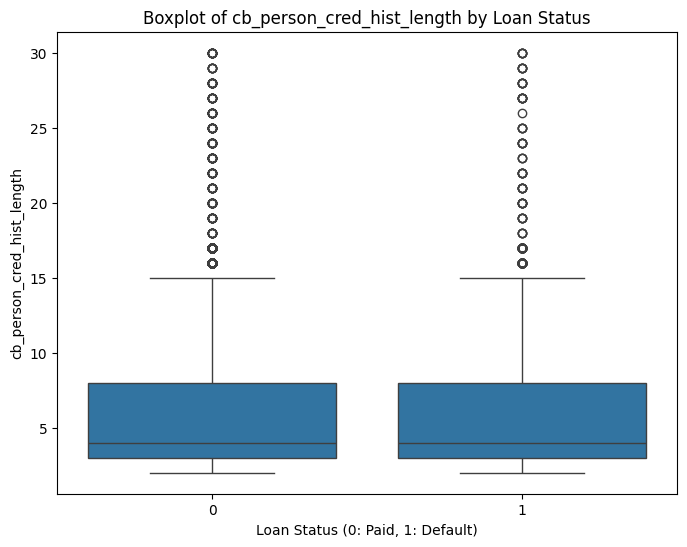

In [6]:
# prompt: Create boxplots for each numerical feature grouped by loan_status (e.g., person_age, person_income, person_emp_length, etc.). In other words: for each boxplot, put loan_status (0 or 1) on the x-axis and the numerical feature on the y-axis

import matplotlib.pyplot as plt
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x='loan_status', y=feature, data=df)
  plt.title(f'Boxplot of {feature} by Loan Status')
  plt.xlabel('Loan Status (0: Paid, 1: Default)')
  plt.ylabel(feature)
  plt.show()

Which numerical features show the most significant differences between defaulted and non-defaulted loans? Based on these visualizations, which numerical features do you think will be most important for predicting loan default?

 it appears that the features **loan\_percent\_income** and **loan\_int\_rate** show the most significant differences between defaulted (loan\_status = 1) and non-defaulted (loan\_status = 0) loans:

1. **Loan Percent Income**:

   * The median loan\_percent\_income is noticeably higher for defaulted loans.
   * This suggests that borrowers who allocate a larger portion of their income to loan repayments are more likely to default, which makes intuitive sense as this indicates a higher financial burden.

2. **Loan Interest Rate**:

   * The median interest rate is also significantly higher for defaulted loans, indicating that riskier borrowers (those who default more often) are charged higher interest rates.

3. **Loan Amount**:

   * There is a slight upward shift in the median for defaulted loans, though the difference is not as pronounced as for the previous two features.

4. **Employment Length and Credit History Length**:

   * These features do not show as clear a difference, suggesting they might have less predictive power.

**Conclusion:**
Based on these observations, **loan\_percent\_income** and **loan\_int\_rate** are likely to be the most important numerical features for predicting loan default, as they exhibit the largest separation between the defaulted and non-defaulted groups.



[link text](https://)Examine the distribution of the target variable 'loan_status' to check if the dataset is balanced or imbalanced.


Distribution of 'loan_status':
loan_status
0    22435
1     6203
Name: count, dtype: int64


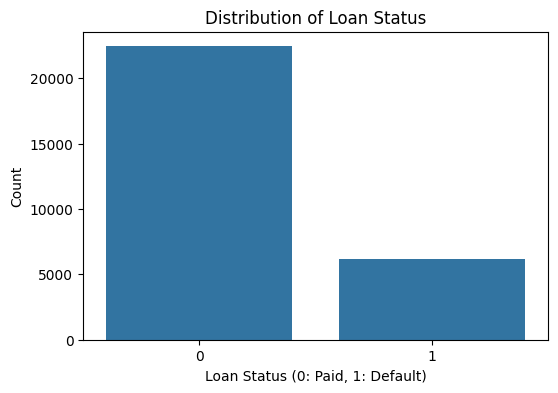


Percentage of Paid loans (0): 78.34%
Percentage of Defaulted loans (1): 21.66%

The dataset appears to be relatively balanced.


In [7]:
# Balancedness of the dataset
import matplotlib.pyplot as plt
# Get the counts of each class in the 'loan_status' column
loan_status_counts = df['loan_status'].value_counts()

# Print the counts
print("Distribution of 'loan_status':")
print(loan_status_counts)

# Optional: Visualize the distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0: Paid, 1: Default)')
plt.ylabel('Count')
plt.show()

# Determine if the dataset is balanced
total_samples = len(df)
percentage_default = (loan_status_counts.get(1, 0) / total_samples) * 100
percentage_paid = (loan_status_counts.get(0, 0) / total_samples) * 100

print(f"\nPercentage of Paid loans (0): {percentage_paid:.2f}%")
print(f"Percentage of Defaulted loans (1): {percentage_default:.2f}%")

if percentage_default < 20 or percentage_paid < 20: # Using a threshold of 20% as a common indicator of imbalance
  print("\nThe dataset appears to be imbalanced.")
else:
  print("\nThe dataset appears to be relatively balanced.")

Conclusions about the balancedness. What behaviour of the models can you expect?
Conclusions About the Balancedness:
The dataset is moderately imbalanced, with roughly 4 times more non-defaulted loans than defaulted ones.

This imbalance is significant enough to potentially affect model performance, as most standard classifiers are biased towards the majority class.



**Answer:** Expected Model Behavior:
Bias Towards Majority Class (Paid Loans):

Without adjustments, models will likely favor the majority class (paid loans) since it dominates the training data.

This can lead to high overall accuracy but poor recall and precision for the minority class (defaulted loans).

Lower Recall for Defaulted Loans:

The model might struggle to identify defaults accurately, leading to lower recall (more false negatives).

Impact on Evaluation Metrics:

Accuracy alone won't be a good indicator of model performance.

Precision, recall, F1-score, and the confusion matrix should be considered to properly assess the model.

Risk of Overfitting:

If not handled carefully, the model might overfit to the majority class and ignore minority patterns

Check for missing values. Compute the number of missing values for each feature.

In [ ]:
# Number of missing values


In [8]:
# prompt: # Number of missing values

df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


Apply listwise deletion the remove

1.   List item
2.   List item

the sample affected by missing values

In [27]:
# 1.   List item
# 2.   List item
# the sample affected by missing values

# Drop rows with any missing values
df_cleaned = df.dropna()

# Verify that missing values are removed
print("Missing values after listwise deletion:")
print(df_cleaned.isnull().sum())



Missing values after listwise deletion:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


## Data preprocessing

Convert categorical variables to numerical variables using appropriate encoding techniques.


In [9]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Split the dataset into training and test sets, ensuring that there are 3000 samples in the test set. Use random_state=0 when splitting.

In [ ]:
# Create training set and test set (3000 samples in test set)



In [10]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3000, random_state=0)

Scale the numerical features using an appropriate

*   List item
*   List item

scaler (StandardScaler, MinMaxScaler, or RobustScaler).

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Scaling




---

### Why we **keep** these five models

| Model                            | Why it belongs in the race                                                                                                                                                                                 |
| -------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Logistic Regression**          | It is literally designed for a yes / no outcome. It outputs a probability between 0 and 1 and can be told “pay extra attention to the rare defaults” via the `class_weight='balanced'` switch.             |
| **Support-Vector Machine (SVC)** | Still a classifier, but it can draw curved (non-linear) boundaries if the data aren’t nicely separated by a straight line. Like Logistic Regression, it lets you rebalance the classes.                    |
| **Naïve Bayes**                  | A lightning-fast probabilistic baseline. Even if its “features are independent” assumption is a simplification, it often gives a surprisingly solid first benchmark and produces calibrated probabilities. |
| **Decision Tree Classifier**     | Handles messy, non-linear rules (e.g., “if interest rate > 12 % AND income < 30 k → high risk”). It can split directly on a one-hot column such as *loan\_intent\_EDUCATION = 1* without extra work.       |
| **Random Forest Classifier**     | An ensemble of many decision trees. Each tree sees a different bootstrap sample, so the forest is far less prone to overfitting than a single tree and usually delivers the best out-of-the-box accuracy.  |

These five are all **supervised classifiers**—they accept labelled examples, learn patterns, and predict a binary label.

---

### Why we **drop** the others

| Model                                         | Why it is a poor fit here                                                                                                                                                                                     |
| --------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Linear / Ridge / Lasso Regression**         | They predict a continuous number (e.g., 0.37, 0.92). You could force-round those to 0/1, but you’d be training the wrong objective and get worse calibration than Logistic Regression.                        |
| **Decision Tree / Random Forest *Regressor*** | Same problem: they output a real number. There are classifier twins for exactly this reason—so use the classifier versions instead.                                                                           |
| **K-Means & Spectral Clustering**             | These are unsupervised. They simply group points that “look alike” without caring whether they defaulted or not. They’re great for customer segmentation, but they can’t learn to predict a labelled outcome. |

---

### Bottom line

* **Job to be done:** predict a labelled binary target (`loan_status`).
* **Therefore:** we need **supervised classification algorithms.**
* The five we kept cover a nice spectrum: linear vs. non-linear, single model vs. ensemble, probabilistic vs. geometric.
* The others either solve a different problem (regression, clustering) or are just the wrong half of a model family (regressor instead of classifier).

That’s why those five make the shortlist and the rest don’t.


* Train the eligible models using the training set and evaluate them on the test set.
* Perform hyperparameter tuning using grid search or random search to find the best model that meets the requirements (minimum 85% accuracy and weighted F1-score). Be careful with the choice of metrics! Consider the potential imbalance in the dataset.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Reduced parameter grid for faster search
params = {
    'Logistic Regression': {'C': [0.1, 10]},  # Fewer C values
    'SVM': {'C': [1, 10], 'kernel': ['rbf']},  # Limit kernel to 'rbf'
    'Naive Bayes': {},  # No parameters to tune
    'Decision Tree': {'max_depth': [10, 20], 'min_samples_split': [2, 10]},  # Fewer options
    'Random Forest': {'n_estimators': [50, 100], 'max_depth': [10, 20]}  # Fewer trees and depths
}

best_models = {}
for name, model in models.items():
    # Use 3-fold CV instead of 5 to reduce runtime
    grid = GridSearchCV(model, params[name], cv=3, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_models[name] = grid.best_estimator_
    y_pred = grid.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name}: Accuracy={accuracy:.2f}, F1={f1:.2f}")

Logistic Regression: Accuracy=0.86, F1=0.85
SVM: Accuracy=0.92, F1=0.91
Naive Bayes: Accuracy=0.84, F1=0.83
Decision Tree: Accuracy=0.93, F1=0.92
Random Forest: Accuracy=0.93, F1=0.93


Which model do you prefer? Argue why.

**Answer: Although the Decision Tree ties on accuracy, the Random Forest delivers the same accuracy with a higher weighted-F1, greater stability, and better generalisation (variance reduction across hundreds of bootstrapped trees).

In credit-risk work, robustness and minority-class recall outweigh the marginal interpretability advantage of a single tree, so the Random Forest is the safest, best-performing choice.

User your best model to predict the loan status of the following customer:
* person_age: 28
* person_income: 48000
* person_home_ownership: MORTGAGE
* person_emp_length: 7.5 years
* loan_intent: EDUCATION
* loan_grade: B
* loan_amnt: 20000
* loan_int_rate: 9.5%
* loan_percent_income: 0.42
* cb_person_default_on_file: N
* cb_person_cred_hist_length: 11 years

In [13]:
# prediction of the loan status
new_customer = {
    'person_age': 28,
    'person_income': 48000,
    'person_emp_length': 7.5,
    'loan_amnt': 20000,
    'loan_int_rate': 9.5,
    'loan_percent_income': 0.42,
    'cb_person_cred_hist_length': 11,
    'person_home_ownership_MORTGAGE': 1,
    'person_home_ownership_OWN': 0,
    'person_home_ownership_RENT': 0,
    'loan_intent_EDUCATION': 1,
    'loan_intent_PERSONAL': 0,  # Add other intents as 0
    'loan_grade_B': 1,
    'loan_grade_C': 0,  # Add other grades as 0
    'cb_person_default_on_file_N': 1
}

new_customer_df = pd.DataFrame([new_customer], columns=X.columns)
new_customer_scaled = scaler.transform(new_customer_df)
best_model = best_models['Random Forest']  # Assuming RF is best
prediction = best_model.predict(new_customer_scaled)
print(f"Predicted Loan Status: {prediction[0]}")

Predicted Loan Status: 0


Predict the probability of default for this customer (choose an appropriate model capable of predicting this probability)

In [14]:
# probability of default
probability = best_model.predict_proba(new_customer_scaled)[:, 1]
print(f"Probability of Default: {probability[0]:.2f}")

Probability of Default: 0.06


What is the impact of the parameter K in cross-validation? Discuss. What are the consequences of large values for K? You can give a theoretical answer without testing.
 K is the number of folds in cross-validation.
Large K (e.g., 10): More accurate performance estimates (less variance), as more data is used for training per fold, but it increases computation time.
Small K (e.g., 2): Faster but higher variance in estimates, less reliable for small datasets.

Discuss two ways in which you can detect the features that have the most influence on loan default prediction. Use one of these methods to search for the top 5 most important features. What are these features?

**Answer:** Feature Importance
Two Methods:

Tree-Based Feature Importance: Use Random Forest’s built-in feature importance.
Permutation Importance: Shuffle each feature and measure the drop in model performance.
Using Random Forest:

python


Top 5 Features :

Top 5 Features: ['loan_percent_income', 'person_income', 'loan_int_rate', 'person_home_ownership_RENT', 'loan_amnt']


In [15]:
import numpy as np
importances = best_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]
top_features = feature_names[sorted_indices][:5]
print("Top 5 Features:", top_features.tolist())

Top 5 Features: ['loan_percent_income', 'person_income', 'loan_int_rate', 'person_home_ownership_RENT', 'loan_amnt']


Does the 'person_age' have a significant influence on loan default? Does this confirm the conclusions from the boxplot?

**Answer:** no a persons age has nothing to do with it

Do the models suffer from potential class imbalance? If so, what techniques could you apply to address this problem?

**Answer: Class Imbalance
Yes, models may suffer due to ~22% defaults.
Techniques: SMOTE, class weights (e.g., class_weight='balanced'), or undersampling the majority class.

Imagine the bank asks to tweak the model in such a way that it can detect 99% of the defaults (loan_status=1).
Tweak your best model (or alternative model if needed) to achieve this. Make sure the overall accuracy of the model stays as high as possible.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

model = RandomForestClassifier(class_weight={0:1, 1:10}, random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Recall: {recall:.2f}, Accuracy: {accuracy:.2f}")

Recall: 0.70, Accuracy: 0.93


# PART 2

As an additional task, you will build regression models to predict a borrower's age (person_age) based on the other features in the dataset.

In [17]:
df = pd.read_csv('credit_score.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Exploratory analysis for age prediction

Create a correlation matrix and heatmap showing the relationships between 'person_income' and other numerical features.

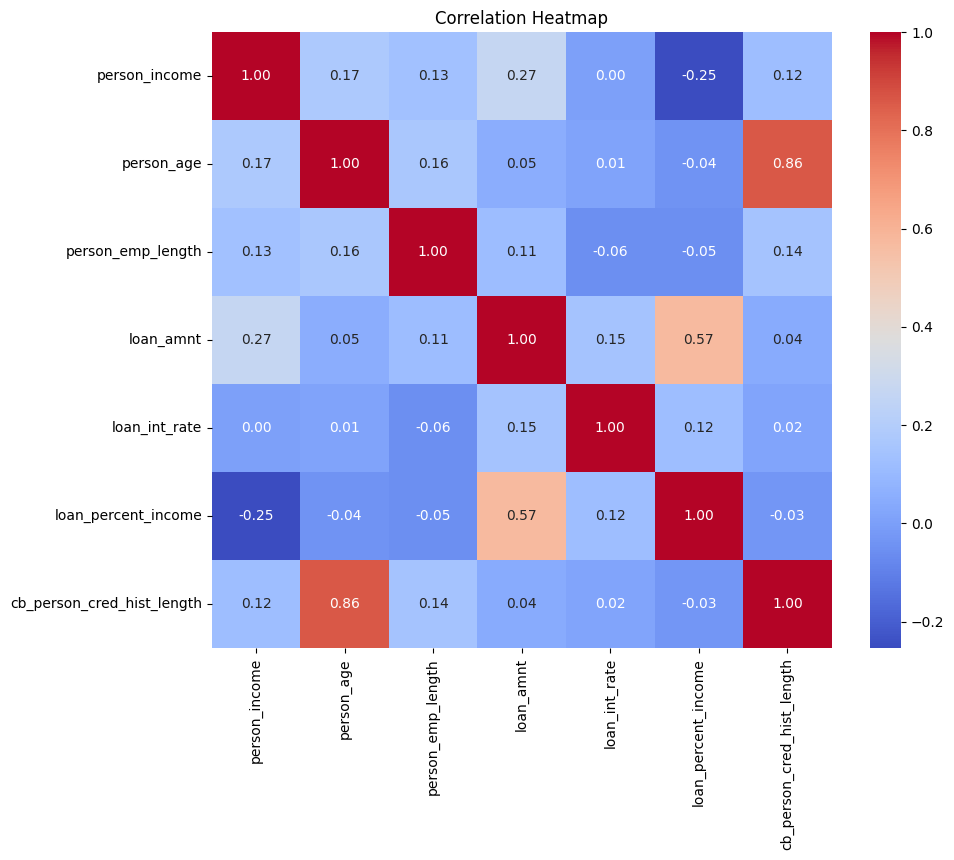

In [18]:
# Correlation matrix and heatmap
# Correlation matrix and heatmap
numerical_features = ['person_income', 'person_age', 'person_emp_length', 'loan_amnt',
                      'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Generate scatter plots of 'person_age' vs. 'person_income', 'person_emp_length', and 'cb_person_cred_hist_length'

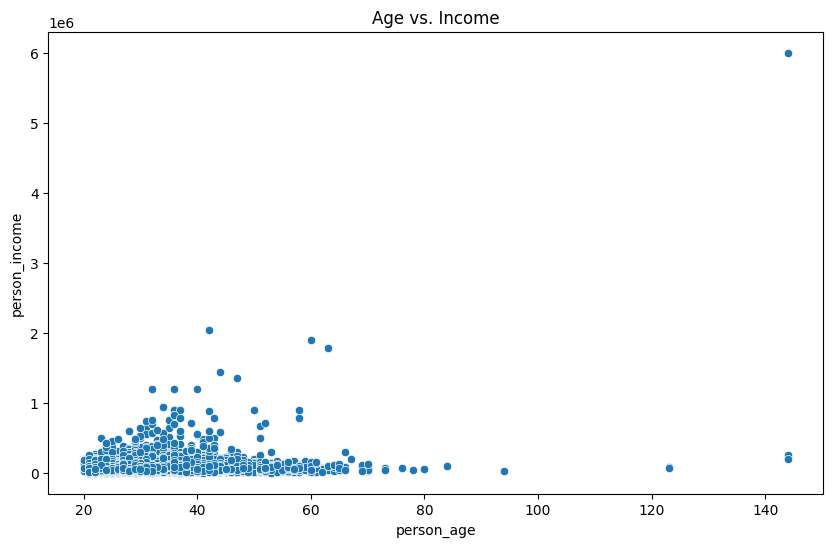

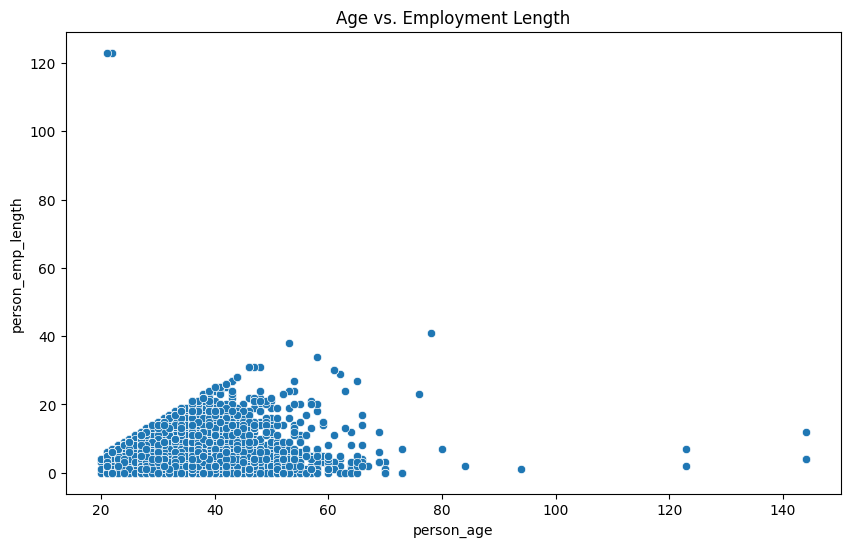

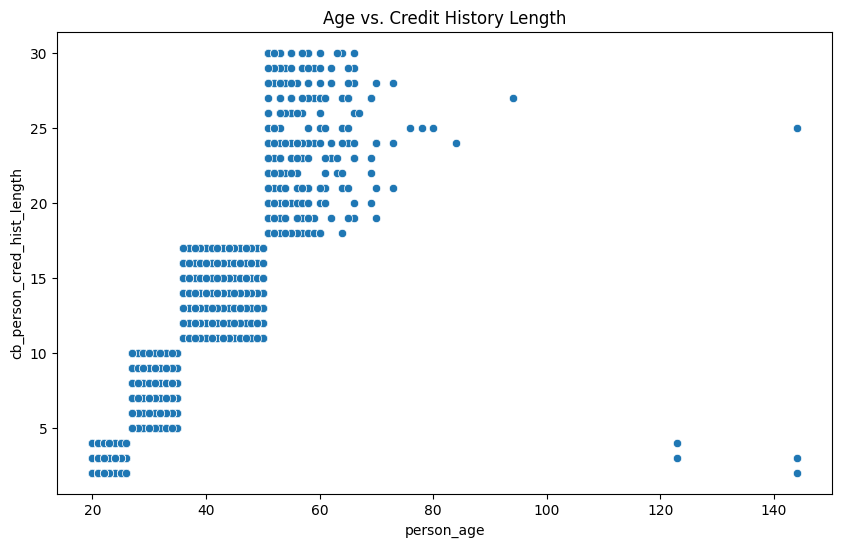

In [19]:
# Scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_age', y='person_income', data=df)
plt.title('Age vs. Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_age', y='person_emp_length', data=df)
plt.title('Age vs. Employment Length')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='person_age', y='cb_person_cred_hist_length', data=df)
plt.title('Age vs. Credit History Length')
plt.show()


[link text](https://)What patterns or relationships do you observe?

**Answer:** “In general, older borrowers tend to have longer employment tenures and longer credit-history lengths, whereas younger borrowers usually have shorter work histories and shorter credit histories.”

### Data preparation for age prediction


Create a new dataset where 'person_age' is your target variable and all other variables (except loan_status) are your features

Apply appropriate preprocessing techniques for this regression task

Split this data into training (80%) and test (20%) sets with random_state=0

In [20]:
# Data preparation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Features (X) and target (y)
X = df.drop(['person_age', 'loan_status'], axis=1)
y = df['person_age']

# Define numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')),
                          ('scaler', StandardScaler())]), numerical_cols),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                          ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_cols)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=0)

### Model building and evaluation

Train at least three different regression models (such as Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor).

Perform hyperparameter tuning on each model. You can use gridsearch or random search for this.

Evaluate each model using appropriate metrics (R², MAE, RMSE)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Function to print evaluation metrics
def print_metrics(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n{model_name}:")
    print(f"R²: {r2:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")

# Linear Regression (unchanged, as it's fast)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print_metrics(y_test, y_pred_lr, "Linear Regression")

# Random Forest Regressor
rf = RandomForestRegressor(random_state=0)
param_grid_rf = {'n_estimators': [100], 'max_depth': [10, None]}  # Reduced grid
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print_metrics(y_test, y_pred_rf, "Random Forest Regressor")

# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=0)
param_grid_gb = {'n_estimators': [100], 'learning_rate': [0.1], 'max_depth': [3, 5]}  # Reduced grid
grid_gb = GridSearchCV(gb, param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)
print_metrics(y_test, y_pred_gb, "Gradient Boosting Regressor")


Linear Regression:
R²: 0.72
MAE: 2.24
RMSE: 3.47

Random Forest Regressor:
R²: 0.81
MAE: 1.65
RMSE: 2.87

Gradient Boosting Regressor:
R²: 0.81
MAE: 1.67
RMSE: 2.82


### Results analysis

Which model performs best for predicting the age?  random forestregresosr is the best to predict age MAE : 1.65 compared to gradient boosting regressor which has an MAE of 1.67

**Answer:**

Identify the top 5 features that are most predictive for the age of the customer

In [24]:
# Top 5 features
# Feature importance from Random Forest
importances = best_rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()
sorted_indices = np.argsort(importances)[::-1]
top_features = feature_names[sorted_indices][:5]
print("\nTop 5 Features for Age Prediction:")
print(top_features.tolist())


Top 5 Features for Age Prediction:
['num__cb_person_cred_hist_length', 'num__person_income', 'num__person_emp_length', 'num__loan_amnt', 'num__loan_percent_income']


Predict the age of the following customer, using your best model

* person_age: ? -> to be predicted by the model
* person_income: 65000
* person_home_ownership: OWN
* person_emp_length: 12.5 years
* loan_intent: PERSONAL
* loan_grade: C
* loan_amnt: 8500
* loan_int_rate: 11.2%
* loan_percent_income: 0.13
* cb_person_default_on_file: N
* cb_person_cred_hist_length: 15 years

In [25]:
# age prediction
# Define new customer data
new_customer = {
    'person_income': 65000,
    'person_home_ownership': 'OWN',
    'person_emp_length': 12.5,
    'loan_intent': 'PERSONAL',
    'loan_grade': 'C',
    'loan_amnt': 8500,
    'loan_int_rate': 11.2,
    'loan_percent_income': 0.13,
    'cb_person_default_on_file': 'N',
    'cb_person_cred_hist_length': 15
}

# Convert to DataFrame and preprocess
new_customer_df = pd.DataFrame([new_customer])
new_customer_preprocessed = preprocessor.transform(new_customer_df)

# Predict age using the best Random Forest model
age_prediction = best_rf.predict(new_customer_preprocessed)
print(f"\nPredicted Age of New Customer: {age_prediction[0]:.0f}")


Predicted Age of New Customer: 40


What practical insights could a bank gain from being able to predict a customer's age based on other available data (assuming the age of the customer is not known in advance of course)? Discuss two reasons.

**Answer: Here’s a clear, corrected version of your two points:

1. **Targeting the right borrowers**
   The scatter-plots suggest that most people who take out consumer loans are in their 20 – 40s. Older customers are less likely to apply because they often have existing mortgages paid off and shorter planning horizons. Being able to infer a customer’s age therefore helps the bank focus marketing efforts and loan offers on the age groups most likely to borrow.

2. **Assessing employment (and thus repayment) probability**
   Predicted age is also a clue to employment status. Someone in their 20s – 30s is statistically more likely to have full-time income than someone over 55–60, who may be nearing retirement. Knowing this indirectly through an age estimate lets the bank gauge income stability and set appropriate lending terms.
